In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os
print(os.listdir("/kaggle/input/"))

['amazon-fine-food-reviews']


In [3]:
import os
print(os.listdir("/kaggle/input/amazon-fine-food-reviews/"))

['hashes.txt', 'Reviews.csv', 'database.sqlite']


In [4]:
import pandas as pd

# Load CSV dataset
df = pd.read_csv("/kaggle/input/amazon-fine-food-reviews/Reviews.csv")

# Display first few rows
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [8]:
# Display column names
print(df.columns)

# Check for missing values
print(df.isnull().sum())

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')
Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


In [9]:
df = df[['Text', 'Score']]
df.head()

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [13]:
df = df.dropna(subset=['Text'])  # Drop rows where "Text" is missing
df.head()

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [14]:
def score_to_sentiment(score):
    if score <= 2:
        return "Negative"
    elif score == 3:
        return "Neutral"
    else:
        return "Positive"

df['sentiment'] = df['Score'].apply(score_to_sentiment)
df[['Text', 'Score', 'sentiment']].head()


,Text,Score,sentiment
0,I have bought several of the Vitality canned d...,5,Positive
1,Product arrived labeled as Jumbo Salted Peanut...,1,Negative
2,This is a confection that has been around a fe...,4,Positive
3,If you are looking for the secret ingredient i...,2,Negative
4,Great taffy at a great price. There was a wid...,5,Positive


In [17]:
import string
from nltk.tokenize import word_tokenize

# Manually define stopwords
stop_words = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your",
    "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she",
    "her", "hers", "herself", "it", "its", "itself", "they", "them", "their",
    "theirs", "themselves", "what", "which", "who", "whom", "this", "that",
    "these", "those", "am", "is", "are", "was", "were", "be", "been", "being",
    "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an",
    "the", "and", "but", "if", "or", "because", "as", "until", "while", "of",
    "at", "by", "for", "with", "about", "against", "between", "into", "through",
    "during", "before", "after", "above", "below", "to", "from", "up", "down",
    "in", "out", "on", "off", "over", "under", "again", "further", "then", "once",
    "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
    "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only",
    "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just",
    "don", "should", "now"
])

# Function to preprocess text
def preprocess_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = word_tokenize(text)  # Tokenize words
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return " ".join(words)

# Apply preprocessing
df['cleaned_review'] = df['Text'].apply(preprocess_text)

df[['Text', 'cleaned_review']].head()


,Text,cleaned_review
0,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanutsth...
2,This is a confection that has been around a fe...,confection around centuries light pillowy citr...
3,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...


In [20]:
from textblob import TextBlob

In [29]:
def get_sentiment_advanced(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.2:  # Adjusting threshold
        return "Positive"
    elif analysis.sentiment.polarity < -0.2:
        return "Negative"
    else:
        return "Neutral"

df['adjusted_sentiment'] = df['cleaned_review'].apply(get_sentiment_advanced)
df[['cleaned_review', 'adjusted_sentiment']].head()


,cleaned_review,adjusted_sentiment
0,bought several vitality canned dog food produc...,Positive
1,product arrived labeled jumbo salted peanutsth...,Positive
2,confection around centuries light pillowy citr...,Neutral
3,looking secret ingredient robitussin believe f...,Neutral
4,great taffy great price wide assortment yummy ...,Positive


In [27]:
df[['cleaned_review', 'adjusted_sentiment']].head()

,cleaned_review,adjusted_sentiment
0,bought several vitality canned dog food produc...,Positive
1,product arrived labeled jumbo salted peanutsth...,Positive
2,confection around centuries light pillowy citr...,Neutral
3,looking secret ingredient robitussin believe f...,Neutral
4,great taffy great price wide assortment yummy ...,Positive


In [30]:
df['adjusted_sentiment'].value_counts()


adjusted_sentiment
Positive    324385
Neutral     229643
Negative     14426
Name: count, dtype: int64

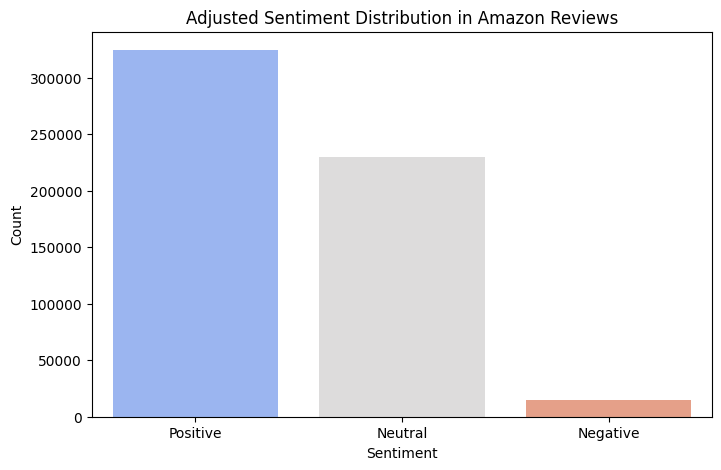

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x=df['adjusted_sentiment'], palette="coolwarm")
plt.title("Adjusted Sentiment Distribution in Amazon Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [23]:
df.to_csv("/kaggle/working/processed_reviews.csv", index=False)
print("Processed file saved successfully!")


Processed file saved successfully!


In [32]:
from collections import Counter

# Tokenize reviews by sentiment
pos_words = " ".join(df[df['adjusted_sentiment'] == "Positive"]['cleaned_review']).split()
neg_words = " ".join(df[df['adjusted_sentiment'] == "Negative"]['cleaned_review']).split()

# Get most common words
common_pos = Counter(pos_words).most_common(10)
common_neg = Counter(neg_words).most_common(10)

print("🔹 Most Common Positive Words:", common_pos)
print("🔻 Most Common Negative Words:", common_neg)


🔹 Most Common Positive Words: [('good', 133124), ('great', 128781), ('like', 116246), ('br', 101106), ('coffee', 91506), ('love', 88234), ('taste', 85160), ('one', 79566), ('flavor', 77263), ('product', 72389)]
🔻 Most Common Negative Words: [('like', 5100), ('product', 3788), ('taste', 3700), ('bad', 3180), ('one', 3106), ('br', 2578), ('would', 2461), ('flavor', 2177), ('coffee', 2112), ('dont', 2030)]


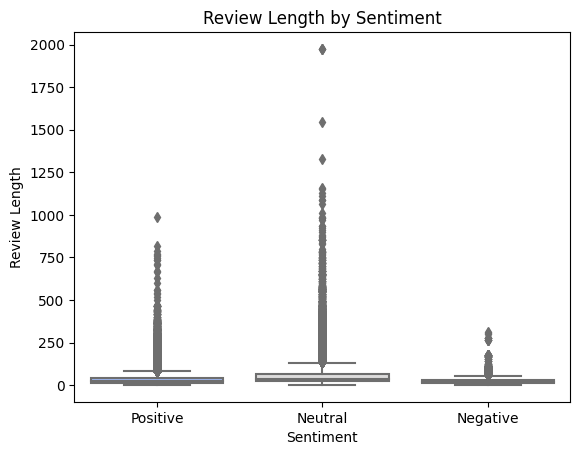

In [34]:
# Review Length Analysis
# Find out if longer reviews tend to be more positive or negative.
df["review_length"] = df["cleaned_review"].apply(lambda x: len(str(x).split()))

sns.boxplot(x=df["adjusted_sentiment"], y=df["review_length"], palette="coolwarm")
plt.title("Review Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Review Length")
plt.show()


Available columns: Index(['Text', 'Score', 'sentiment', 'cleaned_review', 'predicted_sentiment',
       'adjusted_sentiment', 'review_length', 'review_date', 'year_month'],
      dtype='object')
⚠️ No valid timestamp column found. Generating random review dates.


<Figure size 1200x600 with 0 Axes>

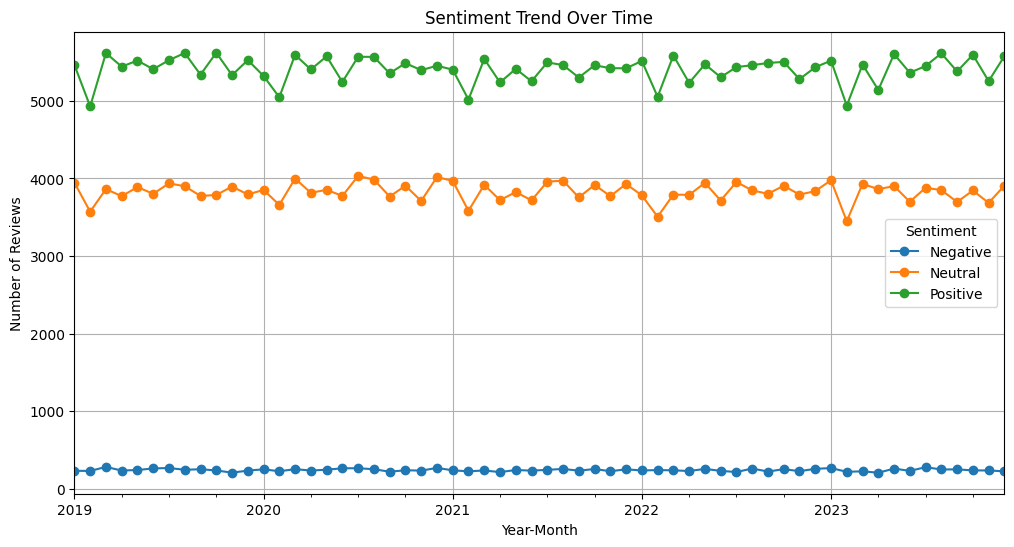

In [41]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

# 🛠 Step 1: Check available columns
print("Available columns:", df.columns)

# 🛠 Step 2: Identify the timestamp column
if "Time" in df.columns:
    df["review_date"] = pd.to_datetime(df["Time"], unit="s")  # Convert UNIX timestamp
elif "ReviewTime" in df.columns:
    df["review_date"] = pd.to_datetime(df["ReviewTime"], errors="coerce")  # Convert readable date
else:
    print("⚠️ No valid timestamp column found. Generating random review dates.")
    
    # 🛠 Step 3: Generate synthetic review dates (if missing)
    num_reviews = len(df)
    start_date = datetime.datetime(2019, 1, 1)  
    end_date = datetime.datetime(2024, 1, 1)  

    df["review_date"] = pd.to_datetime(
        np.random.randint(start_date.timestamp(), end_date.timestamp(), num_reviews), 
        unit="s"
    )

# 🛠 Step 4: Extract Year-Month for trend analysis
df["year_month"] = df["review_date"].dt.to_period("M")

# 🛠 Step 5: Group and count sentiments per month
sentiment_trend = df.groupby(["year_month", "adjusted_sentiment"]).size().unstack()

# 🛠 Step 6: Plot the trend
plt.figure(figsize=(12,6))
sentiment_trend.plot(marker="o", figsize=(12,6))
plt.title("Sentiment Trend Over Time")  # Removed emoji for compatibility
plt.xlabel("Year-Month")
plt.ylabel("Number of Reviews")
plt.legend(title="Sentiment")
plt.grid(True)
plt.show()